In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../code')
from read_files import *
from stats import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [53]:
cyto_score = get_cyto_score()
cyto_score_pv = get_paried_cyto_score(cyto_score)
cyto_score_pv

status,Pre,On
pt,,
Pt1,48.985749,13.230992
Pt2,40.385277,44.807463


In [6]:
all_bc

Sample2,SRR5088813,SRR5088814,SRR5088815,SRR5088816
Sample1,,,,
SRR5088813,NaN,0.966373,0.997733,0.998467
SRR5088814,0.966373,NaN,0.996292,0.996257
SRR5088815,0.997733,0.996292,NaN,0.985554
SRR5088816,0.998467,0.996257,0.985554,NaN


<Axes: xlabel='Sample2', ylabel='Sample1'>

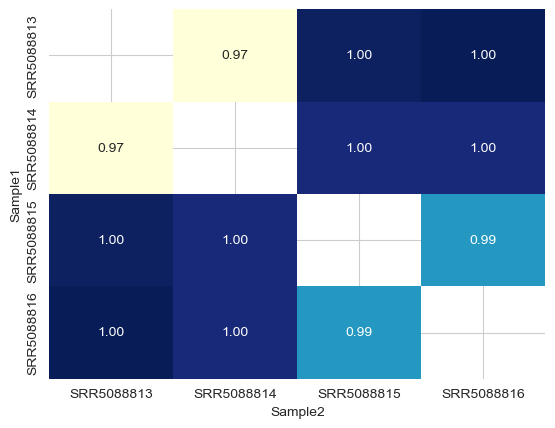

In [5]:
report_paths = {x:f"../data/{x}/{x}_report.tsv" for x in ["SRR5088813", "SRR5088814", "SRR5088815", "SRR5088816"]}
all_bc = run_all_reports_bc(report_paths)

sns.heatmap(all_bc, annot=True, fmt=".2f", cmap="YlGnBu", cbar=False)

In [23]:
SRR5088813_report['#count'].sum(), SRR5088814_report['#count'].sum()

(np.int64(19702), np.int64(1933))

In [48]:
from scipy.spatial.distance import braycurtis

compare_freqs = SRR5088813_report.set_index('CDR3aa')[['frequency']]\
    .join(SRR5088814_report.set_index('CDR3aa')[['frequency']], rsuffix='_SRR5088814', lsuffix='_SRR5088813', how='outer').fillna(0)\
    .drop('out_of_frame')

braycurtis(compare_freqs['frequency_SRR5088813'].values, compare_freqs['frequency_SRR5088814'].values)

np.float64(0.9663727048682665)

In [50]:
braycurtis([0,0,10, 10, 0, 0], [0,0,5,15, 0, 0])

np.float64(0.25)

In [47]:
compare_freqs.sort_values(by='frequency_SRR5088813', ascending=False).head(30)

,frequency_SRR5088813,frequency_SRR5088814
CDR3aa,,
CAALPTGWFKIF,0.363636,0.000000
CAALSKTF,0.363636,0.000000
CASSLGAGYEQYF,0.124294,0.000000
CAVHFGNEKLTF,0.112245,0.000000
CAANSGGGADGLTF,0.102041,0.120000
CARAAPYCSSTSCYGGYFDYW,0.099690,0.000000
CAVHNDYKLSF,0.091837,0.000000
CADLPTGWFKIF,0.090909,0.000000
CALWEVDVIYYKKLF,0.090909,0.000000


In [ ]:

SRR5088813_report


In [35]:
SRR5088813_report

,#count,frequency,CDR3nt,CDR3aa,V,D,J,C,cid,cid_full_length
0,1019,0.070996,TGTCAGCAGTATGGTTCCTCGCCTCGGACGTTC,CQQYGSSPRTF,IGKV3-20*01,.,IGKJ1*01,IGKC,assemble6,1
1,837,0.058331,TGCCAACAGTATAATAGTTATTCTAGGACGTTC,CQQYNSYSRTF,IGKV1-5*01,.,IGKJ1*01,IGKC,assemble2,1
2,699,0.048676,TGTCAGCAGTATGGTAGCTCACCTCCGTACACTTTT,CQQYGSSPPYTF,IGKV3-20*01,.,IGKJ2*01,IGKC,assemble0,0
3,655,0.045652,TGTCAACAGTATGATAATCTTCCCCTCACTTTC,CQQYDNLPLTF,IGKV1-33*01,.,IGKJ4*01,IGKC,assemble15,1
4,603,0.042004,TGTCAACAGTCTTATACTGACCCTCTCACTTTC,CQQSYTDPLTF,IGKV1-8*01,.,IGKJ4*01,IGKC,assemble14,1
...,...,...,...,...,...,...,...,...,...,...
841,1,0.000070,TGCAGCTCATATTGACGTAGTAGCACTGTGGTATTC,CSSY_RSSTVVF,IGLV2-23*01,.,IGLJ2*01,IGLC,assemble3449,0
842,1,0.000070,TGCCAACAGTATAATAGTTATTCTATGATGTTC,CQQYNSYSMMF,IGKV1-5*03,.,IGKJ1*01,IGKC,assemble943,0
843,1,0.000070,TGCCAACAGTATAATAGTTACCCGTACACTTTT,CQQYNSYPYTF,IGKV1-5*01,.,IGKJ2*01,IGKC,assemble371,0
844,1,0.000070,TGTCAAAACTATGATAGGCCCTATATAATATTC,CQNYDRPYIIF,IGLV6-57*01,.,IGLJ2*01,IGLC,assemble1282,0


In [19]:
np.intersect1d(SRR5088814_report.CDR3aa, SRR5088813_report.CDR3aa)

array(['CAANSGGGADGLTF', 'CAAWDDSLSGWVF', 'CISYTSSATVVF', 'CLQHRADPPTF',
       'CMQALQTPLTF', 'CMQRIEFPLTF', 'CQAWVSSTVVF', 'CQHFDNSPFF',
       'CQQSYNIPRTF', 'CQQSYSSSPVTF', 'CQQSYSTLWTF', 'CQQSYSTPRTF',
       'CQQSYSTPYTF', 'CQQSYTDPLTF', 'CQQTYSGLTF', 'CQQYDNLPYTF',
       'CQQYNNWPLTF', 'CQQYNSHPWTF', 'CQQYYNTPLTF', 'CQQYYNYPPLTF',
       'CQQYYSYPSTF', 'CQSRDSSVNHYVF', 'CQSVDSTVTYRVF', 'CSSFTSSNTLIF',
       'CSSWTSSNTLVF', 'CTSYATSAWVF', 'CVLYMGSGIWVF', 'out_of_frame'],
      dtype=object)

In [ ]:
# do a bray curtis analysis

,#count,frequency,CDR3nt,CDR3aa,V,D,J,C,cid,cid_full_length
0,1019,0.070996,TGTCAGCAGTATGGTTCCTCGCCTCGGACGTTC,CQQYGSSPRTF,IGKV3-20*01,.,IGKJ1*01,IGKC,assemble6,1
1,837,0.058331,TGCCAACAGTATAATAGTTATTCTAGGACGTTC,CQQYNSYSRTF,IGKV1-5*01,.,IGKJ1*01,IGKC,assemble2,1
2,699,0.048676,TGTCAGCAGTATGGTAGCTCACCTCCGTACACTTTT,CQQYGSSPPYTF,IGKV3-20*01,.,IGKJ2*01,IGKC,assemble0,0
3,655,0.045652,TGTCAACAGTATGATAATCTTCCCCTCACTTTC,CQQYDNLPLTF,IGKV1-33*01,.,IGKJ4*01,IGKC,assemble15,1
4,603,0.042004,TGTCAACAGTCTTATACTGACCCTCTCACTTTC,CQQSYTDPLTF,IGKV1-8*01,.,IGKJ4*01,IGKC,assemble14,1
...,...,...,...,...,...,...,...,...,...,...
841,1,0.000070,TGCAGCTCATATTGACGTAGTAGCACTGTGGTATTC,CSSY_RSSTVVF,IGLV2-23*01,.,IGLJ2*01,IGLC,assemble3449,0
842,1,0.000070,TGCCAACAGTATAATAGTTATTCTATGATGTTC,CQQYNSYSMMF,IGKV1-5*03,.,IGKJ1*01,IGKC,assemble943,0
843,1,0.000070,TGCCAACAGTATAATAGTTACCCGTACACTTTT,CQQYNSYPYTF,IGKV1-5*01,.,IGKJ2*01,IGKC,assemble371,0
844,1,0.000070,TGTCAAAACTATGATAGGCCCTATATAATATTC,CQNYDRPYIIF,IGLV6-57*01,.,IGLJ2*01,IGLC,assemble1282,0


In [12]:
report.D.str.split('-').str[0].value_counts()

D
.           133
IGHD6         5
IGHD3         5
TRBD1*01      5
IGHD2         4
IGHD4         4
IGHD5         3
IGHD1         2
TRBD2*01      2
TRBD2*02      1
Name: count, dtype: int64

In [9]:
report.V.str.split('-').str[0].value_counts()

V
IGKV1            51
IGLV2            21
IGLV1            12
IGKV3            12
IGHV3             9
IGHV4             7
IGKV1D            5
IGKV2             5
IGLV3             5
IGHV2             4
IGKV4             4
IGHV1             3
IGKV2D            3
TRGV10*02         2
IGLV6             2
TRAV8             2
TRAV23/DV6*02     2
TRAV20*01         2
TRBV7             2
TRAV13            1
TRBV9*01          1
TRBV4             1
TRAV21*01         1
TRAV29/DV5*01     1
IGLV8             1
TRBV24            1
TRBV6             1
TRBV29            1
TRAV14/DV4*01     1
TRBV14*01         1
Name: count, dtype: int64

In [ ]:

TCAGTCTCAGTCAGGACACAGCATGGACATGAGGGTCCCTGCTCAGCTCCTGGGACTCCTGCTGCTCTGGCTCCCAGATAGCAGATGTGACATCCAGATGACCCAGTCTCCATCCTCCCTGTCTGCACCTGTTGGAGACAGAGTCACCATCACTTGCCGGGCGAGTCGGGNNNNNNNCAACTTATTTCTGTCAAAACTATAACAGTGCCCCTCAAACGTTCGGCCAAG
CCCAGTCAGGACACAGCATGGACATGAGAGTCCTCGCTCAGCTCCTGGGGCTCCTGCTGCTCTGTTTCTCAGGTGCCAGATGNNNNNNNTCCATCTTCACTGCCTGCATCTGTAGGAGACAGAGTCACCATCACTTGTCGGGCGAGTCAGGACATTAGCAATTATTTAGCCTGGGTTCAGCAGAAACCAGGGAAAGCCCCTAAGCGCCTGATCTANNNNNNNCCTGATCTATGCTGCATCCAGTTTGCAAAGTGGGGTCCCATCAAAGTTCAGCG
